<a href="https://colab.research.google.com/github/pp2098/Wine-Quality-Prediction/blob/main/Copy_of_CapstoneProject_ML_Multi1_PoojaPandey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**

In [ ]:
#Predicting the Quality of Wine on the between on the basis of scale
#Dealing with Multiclassification problem
#Building algorithms using various ML model i.e., Logistic Regression,Decision Tree,Random Forest,KNN,SVM

**Importing library and dataset**

In [ ]:
#Importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the Dataset
wine_df=pd.read_csv('QualityPrediction.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**EDA/Preprocessing**

In [ ]:
#Analysing the quality variable on the basis of scale
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#summary of data
wine_df.shape
#conclusion:There are 1599 rows and 12 columns

(1599, 12)

In [ ]:
#Checking for the null value in the dataset
wine_df.info()
#There is no missinh value in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Statistical analysis of the dataset
wine_df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Data Analysis & Visualization**

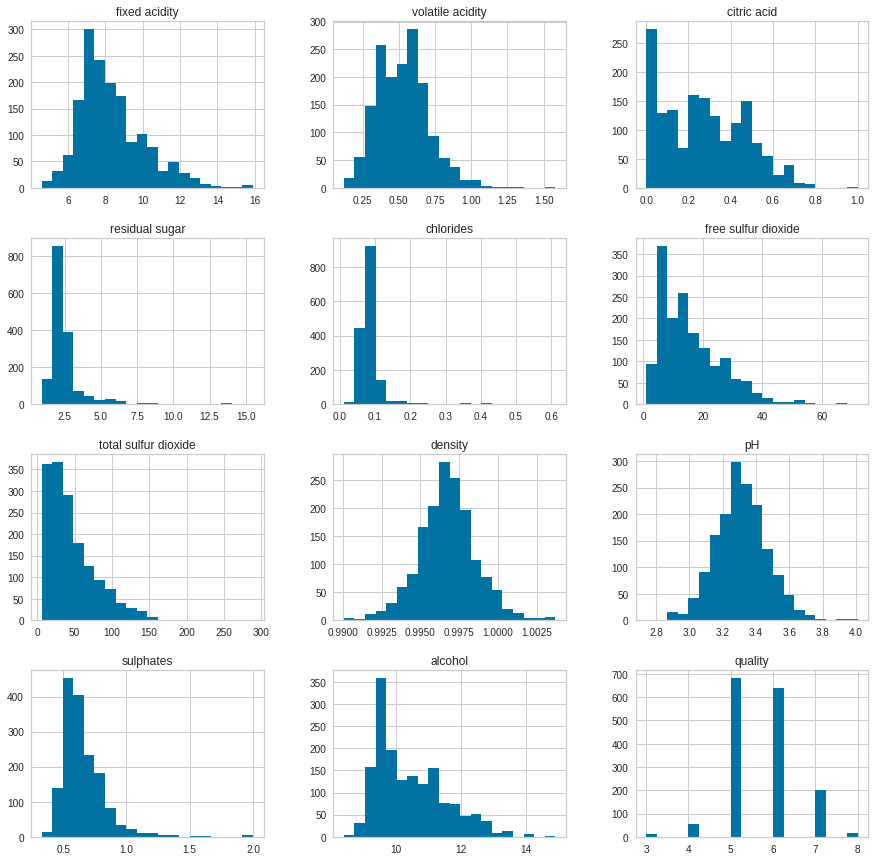

In [ ]:
#Visualization of disturibution of dataset 
wine_df.hist(bins=20,figsize=(15,15))
plt.show()
#conclusion:Most of the features and target variable is normally disturbuted while some are skewed

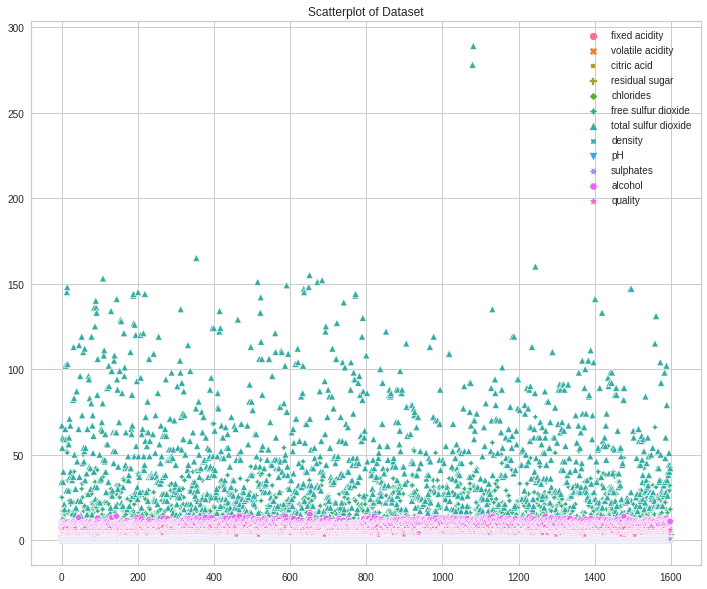

In [ ]:
#Visualization of spreadness of dataset
plt.figure(figsize=(12,10))
sns.scatterplot(data=wine_df)
plt.title("Scatterplot of Dataset")
plt.show()

<Figure size 864x720 with 0 Axes>

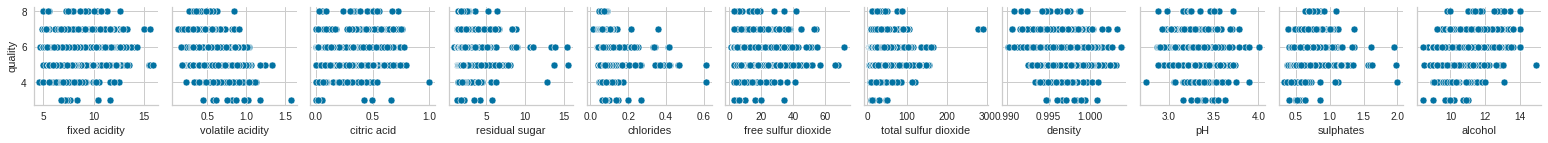

In [ ]:
#Visualization of features with respect to target variable
plt.figure(figsize=(12,10))
sns.pairplot(data=wine_df,x_vars=wine_df.drop('quality',axis=1),y_vars='quality',size=2,kind='scatter',height=10.0)
plt.show()

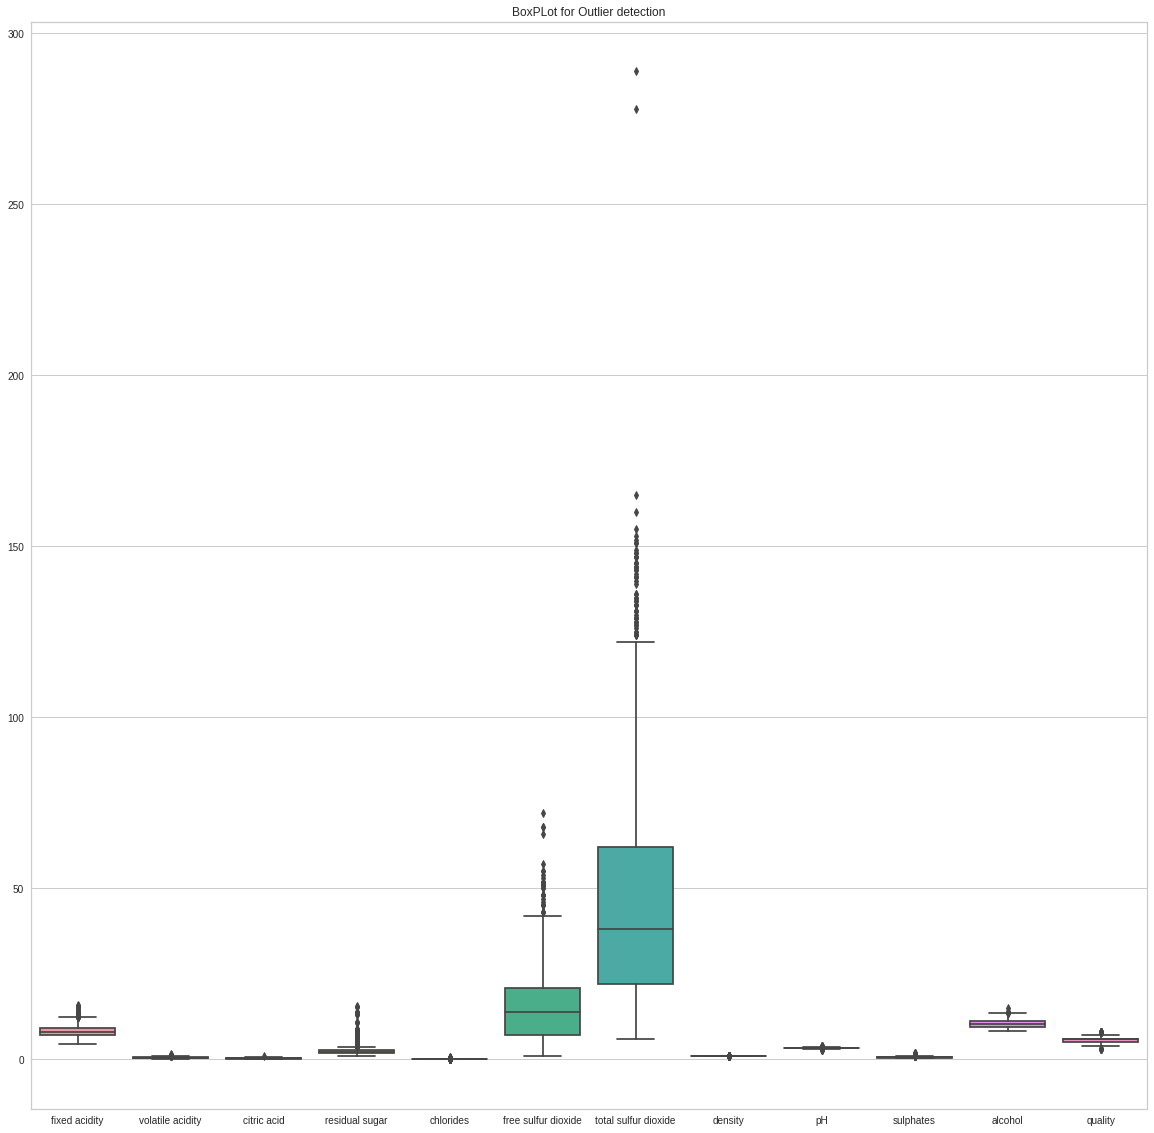

In [ ]:
#visualization of detection of outlier int he datset
plt.figure(figsize=(20,20))
sns.boxplot(data=wine_df)
plt.title("BoxPLot for Outlier detection")
plt.show()
#conclusion:Outliers are detected in the dataset but i m not removing them because here the main motive of the problem is to predict the quality of wine
#so it means that good quality wine may having some extreme value of features.

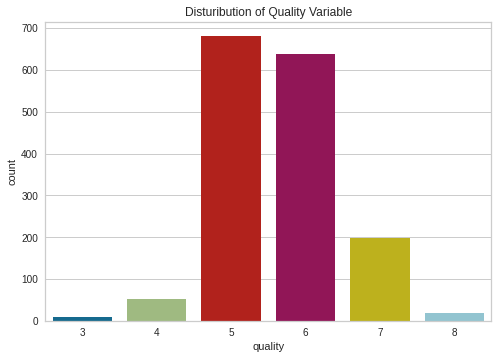

In [ ]:
#Visualization of quality disturbution
sns.countplot(data=wine_df,x='quality')
plt.title("Disturibution of Quality Variable")
plt.show()
#conclusion:It is aprrox normally distuributed.


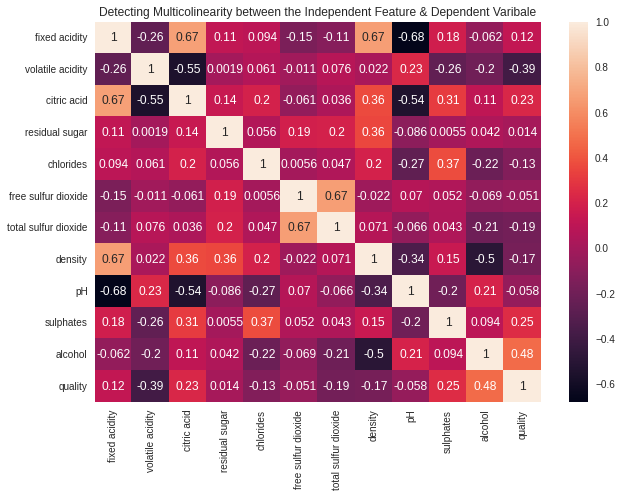

In [ ]:
#Detecting the Multicolinearity between the indepedent features
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(),annot=True)
plt.title("Detecting Multicolinearity between the Independent Feature & Dependent Varibale")
plt.show()
#Conclusion:There is high level of multicolinearity exists,but since it is prediction probelm it is doesnt affect much

In [ ]:
#Detection of Correleation of Independent features with target variable.
wine_df.corr()['quality'].sort_values()
#Conclusion:Alcohol having highest positive correleation with the quality while volatile hvaing lowest neagtive correleation with it.

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [ ]:
#Value count of each scale in quality target variable
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#Assigning the continous scale for each value from 0 to 5 in the quality variable
def compo(x):
  if x<4:
    return 0
  elif x==4:
    return 1
  elif x==5:
    return 2
  elif x==6:
    return 3
  elif x==7:
    return 4
  else:
    return 5
wine_df['quality']=wine_df['quality'].apply(compo)
wine_df['quality'].value_counts()


2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [ ]:
#Assigning the X and Y varibale for data splitting
X=wine_df.drop('quality',axis=1)
y=wine_df['quality']

**Splitting the dataset and Feature Engineering**

In [ ]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)
#Scale down the features by Standrad Scaler necessary for Logisti Regression,KNN,SVM because they are distance model
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
x_test=ss.transform(X_test)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (1279, 11)
X_test shape:  (320, 11)
Y_train shape:  (1279,)
Y_test shape:  (320,)


Model Building
1. LOGISTIC REGRESSION 

In [ ]:
#Initiating the Logistic Regression model
lg=LogisticRegression(random_state=100)
#Fitting the data
lg.fit(X_train,y_train)
#Predicting the value on  the basis of X_test
lgpred=lg.predict(X_test)
#Calculating the Accuracy of model
acc_sr=metrics.accuracy_score(lgpred,y_test)
print("Accuracy of the logistic regression model")
print(acc_sr)
#conclusion:accuracy score is quite low for multiclassification logistic model

Accuracy of the logistic regression model
0.403125


[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   5 104  99  21   3]
 [  0   0   2   5   1   0]
 [  1   5  24  28  20   2]
 [  0   0   0   0   0   0]]


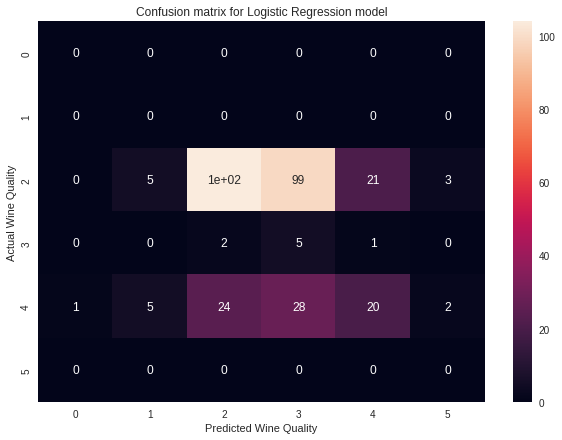

In [ ]:
#Building the confusion matrix
print(metrics.confusion_matrix(lgpred,y_test))
plt.figure(figsize=(10,7))
conf_mat=metrics.confusion_matrix(lgpred,y_test)
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion matrix for Logistic Regression model")
plt.xlabel("Predicted Wine Quality")
plt.ylabel("Actual Wine Quality")
plt.show()

In [ ]:
print("Classification report for Logistic Regression Model")
print(metrics.classification_report(y_test,lgpred))
#conclusion:The class 5 is best classifier among all and class 3,4,6,8 are classified so badly having f1 score 
#weighted average is also very low about 31%

Classification report for Logistic Regression Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.45      0.80      0.57       130
           3       0.62      0.04      0.07       132
           4       0.25      0.48      0.33        42
           5       0.00      0.00      0.00         5

    accuracy                           0.40       320
   macro avg       0.22      0.22      0.16       320
weighted avg       0.47      0.40      0.31       320



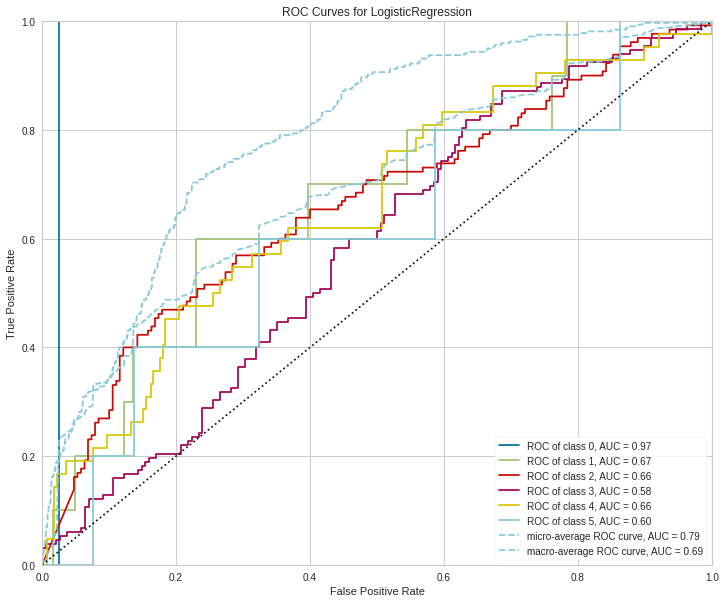

In [ ]:
from yellowbrick.classifier import ROCAUC
plt.figure(figsize=(12,10))
visualizer=ROCAUC(lg,classes=[0,1,2,3,4,5])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()
#Conclusion:overall the model is not a good fit curve 
#since it is imbalance classification so we use micro average so its average metric value is also low

In [ ]:
print("Cross_val_score for logistic Regression: ")
score=cross_val_score(lg,X_train,y_train,cv=5)
score.mean()
#accuracy mean for all classes is also quite low

Cross_val_score for logistic Regression: 


0.6067738970588235

**2. Random Forest**

In [ ]:
#Initiating the randomforest method
rforest=RandomForestClassifier(random_state=101)
rforest.fit(X_train,y_train)
y_pred=rforest.predict(X_test)
print("Accuracy score for Random Forest: ")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score for Random Forest: 
0.40625


[[  0   0   1   0   0   0]
 [  0   0  10   0   0   0]
 [  0   0 130   0   0   0]
 [  0   0 132   0   0   0]
 [  0   0  42   0   0   0]
 [  0   0   5   0   0   0]]
Confusion matrix for RF


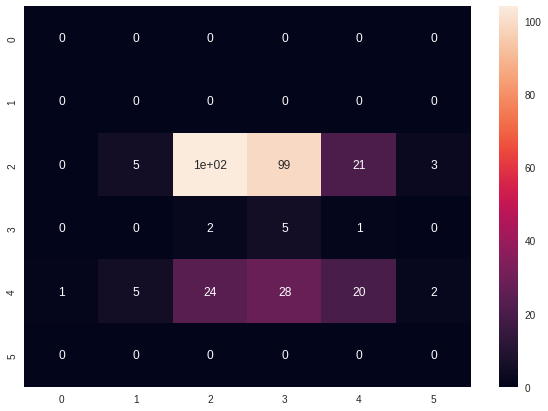

In [ ]:
print(metrics.confusion_matrix(y_test,y_pred))
con_mat=metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat,annot=True)
print("Confusion matrix for RF")
plt.show()

In [ ]:
print("Classification for RF model: ")
print(metrics.classification_report(y_test,y_pred))
#accuracy and weighted average value is quite low for RF,class 5 is best classifier among all compared to f1 score

Classification for RF model: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.41      1.00      0.58       130
           3       0.00      0.00      0.00       132
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00         5

    accuracy                           0.41       320
   macro avg       0.07      0.17      0.10       320
weighted avg       0.17      0.41      0.23       320



In [ ]:
from yellowbrick.classifier import ROCAUC

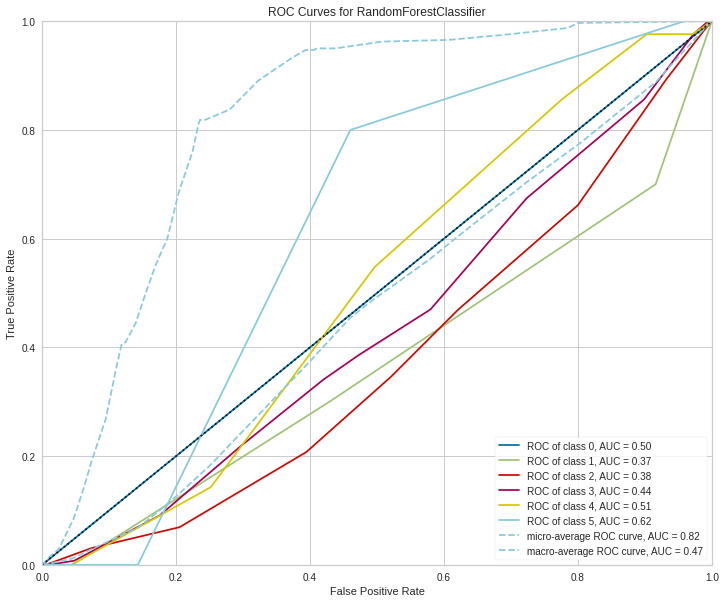

In [ ]:
plt.figure(figsize=(12,10))
visualizer=ROCAUC(rforest,classes=[0,1,2,3,4,5])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()
#class 5 having highest area under the curve and the micro average score is fine means its average metric is fine
#model also not seems to be perfected able to classifying but it classifies some classes convenentily

In [ ]:
print("cross_val_score for RF MOdel")
score1=cross_val_score(rforest,X_train,y_train,cv=5)
score1.mean()

cross_val_score for RF MOdel


0.6724264705882353

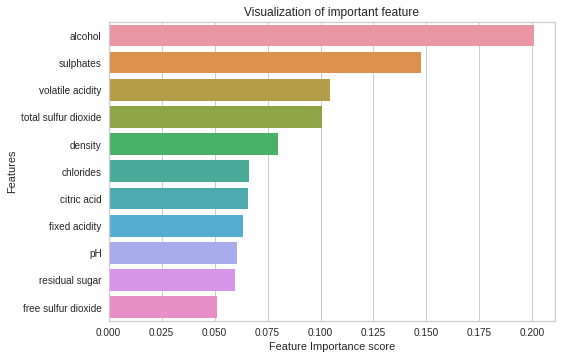

In [ ]:
#Important features according to the RF Model
feature_importance=pd.Series(rforest.feature_importances_,wine_df.columns[:11]).sort_values(ascending=False)
sns.barplot(x=feature_importance,y=feature_importance.index)
plt.title("Visualization of important feature")
plt.xlabel("Feature Importance score")
plt.ylabel("Features")
plt.show()
#Alcohol is the very and most important feature fro predicting the quality of wine

**Hyper Parameter Tuning with GRIDSEARCHCV**

In [ ]:
param_dist={'max_depth':[4,6,8,10],
            'max_features':['auto','sqrt','log2',None],
            'bootstrap':[True,False],
            'criterion':['gini','entropy']}
cv_rf=GridSearchCV(rforest,cv=10,param_grid=param_dist,n_jobs=-1)
cv_rf.fit(X_train,y_train)
print(cv_rf.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}


In [ ]:
rforest.set_params(max_depth=8,
                   max_features='auto',
                   criterion='entropy',
                   bootstrap=False)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=8,
                       random_state=101)

In [ ]:
rforest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=8,
                       random_state=101)>

In [ ]:
rforest.fit(X_train,y_train)
rfor_pred_grid=rforest.predict(X_test)
print(metrics.accuracy_score(y_test,rfor_pred_grid))
#Here i m getting quite low accuracy as compared to the accuracy of the before tuning of hyperparameters


0.365625


In [ ]:
print(metrics.confusion_matrix(y_test,rfor_pred_grid))

[[ 0  0  0  1  0  0]
 [ 0  0  3  7  0  0]
 [ 0  0 65 65  0  0]
 [ 0  0 80 52  0  0]
 [ 0  0 30 12  0  0]
 [ 0  0  4  1  0  0]]


In [ ]:
print(metrics.classification_report(y_test,rfor_pred_grid))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.36      0.50      0.42       130
           3       0.38      0.39      0.39       132
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00         5

    accuracy                           0.37       320
   macro avg       0.12      0.15      0.13       320
weighted avg       0.30      0.37      0.33       320



**3. Decision Tree Model**

In [ ]:
#Intialization of model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=58,max_depth=4)
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print(metrics.accuracy_score(y_test,dt_pred))


0.4125


[Text(0.5, 0.9, 'alcohol <= 0.102\ngini = 0.642\nsamples = 1279\nvalue = [9, 43, 551, 506, 157, 13]\nclass = Bad Quality'),
 Text(0.25, 0.7, 'total sulfur dioxide <= 1.574\ngini = 0.541\nsamples = 786\nvalue = [6, 27, 465, 256, 30, 2]\nclass = Bad Quality'),
 Text(0.125, 0.5, 'sulphates <= -0.487\ngini = 0.568\nsamples = 689\nvalue = [6, 26, 375, 251, 29, 2]\nclass = Bad Quality'),
 Text(0.0625, 0.3, 'alcohol <= -0.635\ngini = 0.496\nsamples = 263\nvalue = [4, 20, 176, 59, 4, 0]\nclass = Bad Quality'),
 Text(0.03125, 0.1, 'gini = 0.389\nsamples = 165\nvalue = [2, 11, 126, 25, 1, 0]\nclass = Bad Quality'),
 Text(0.09375, 0.1, 'gini = 0.61\nsamples = 98\nvalue = [2, 9, 50, 34, 3, 0]\nclass = Bad Quality'),
 Text(0.1875, 0.3, 'fixed acidity <= 0.944\ngini = 0.575\nsamples = 426\nvalue = [2, 6, 199, 192, 25, 2]\nclass = Bad Quality'),
 Text(0.15625, 0.1, 'gini = 0.553\nsamples = 336\nvalue = [0, 5, 178, 136, 16, 1]\nclass = Bad Quality'),
 Text(0.21875, 0.1, 'gini = 0.548\nsamples = 90\nva

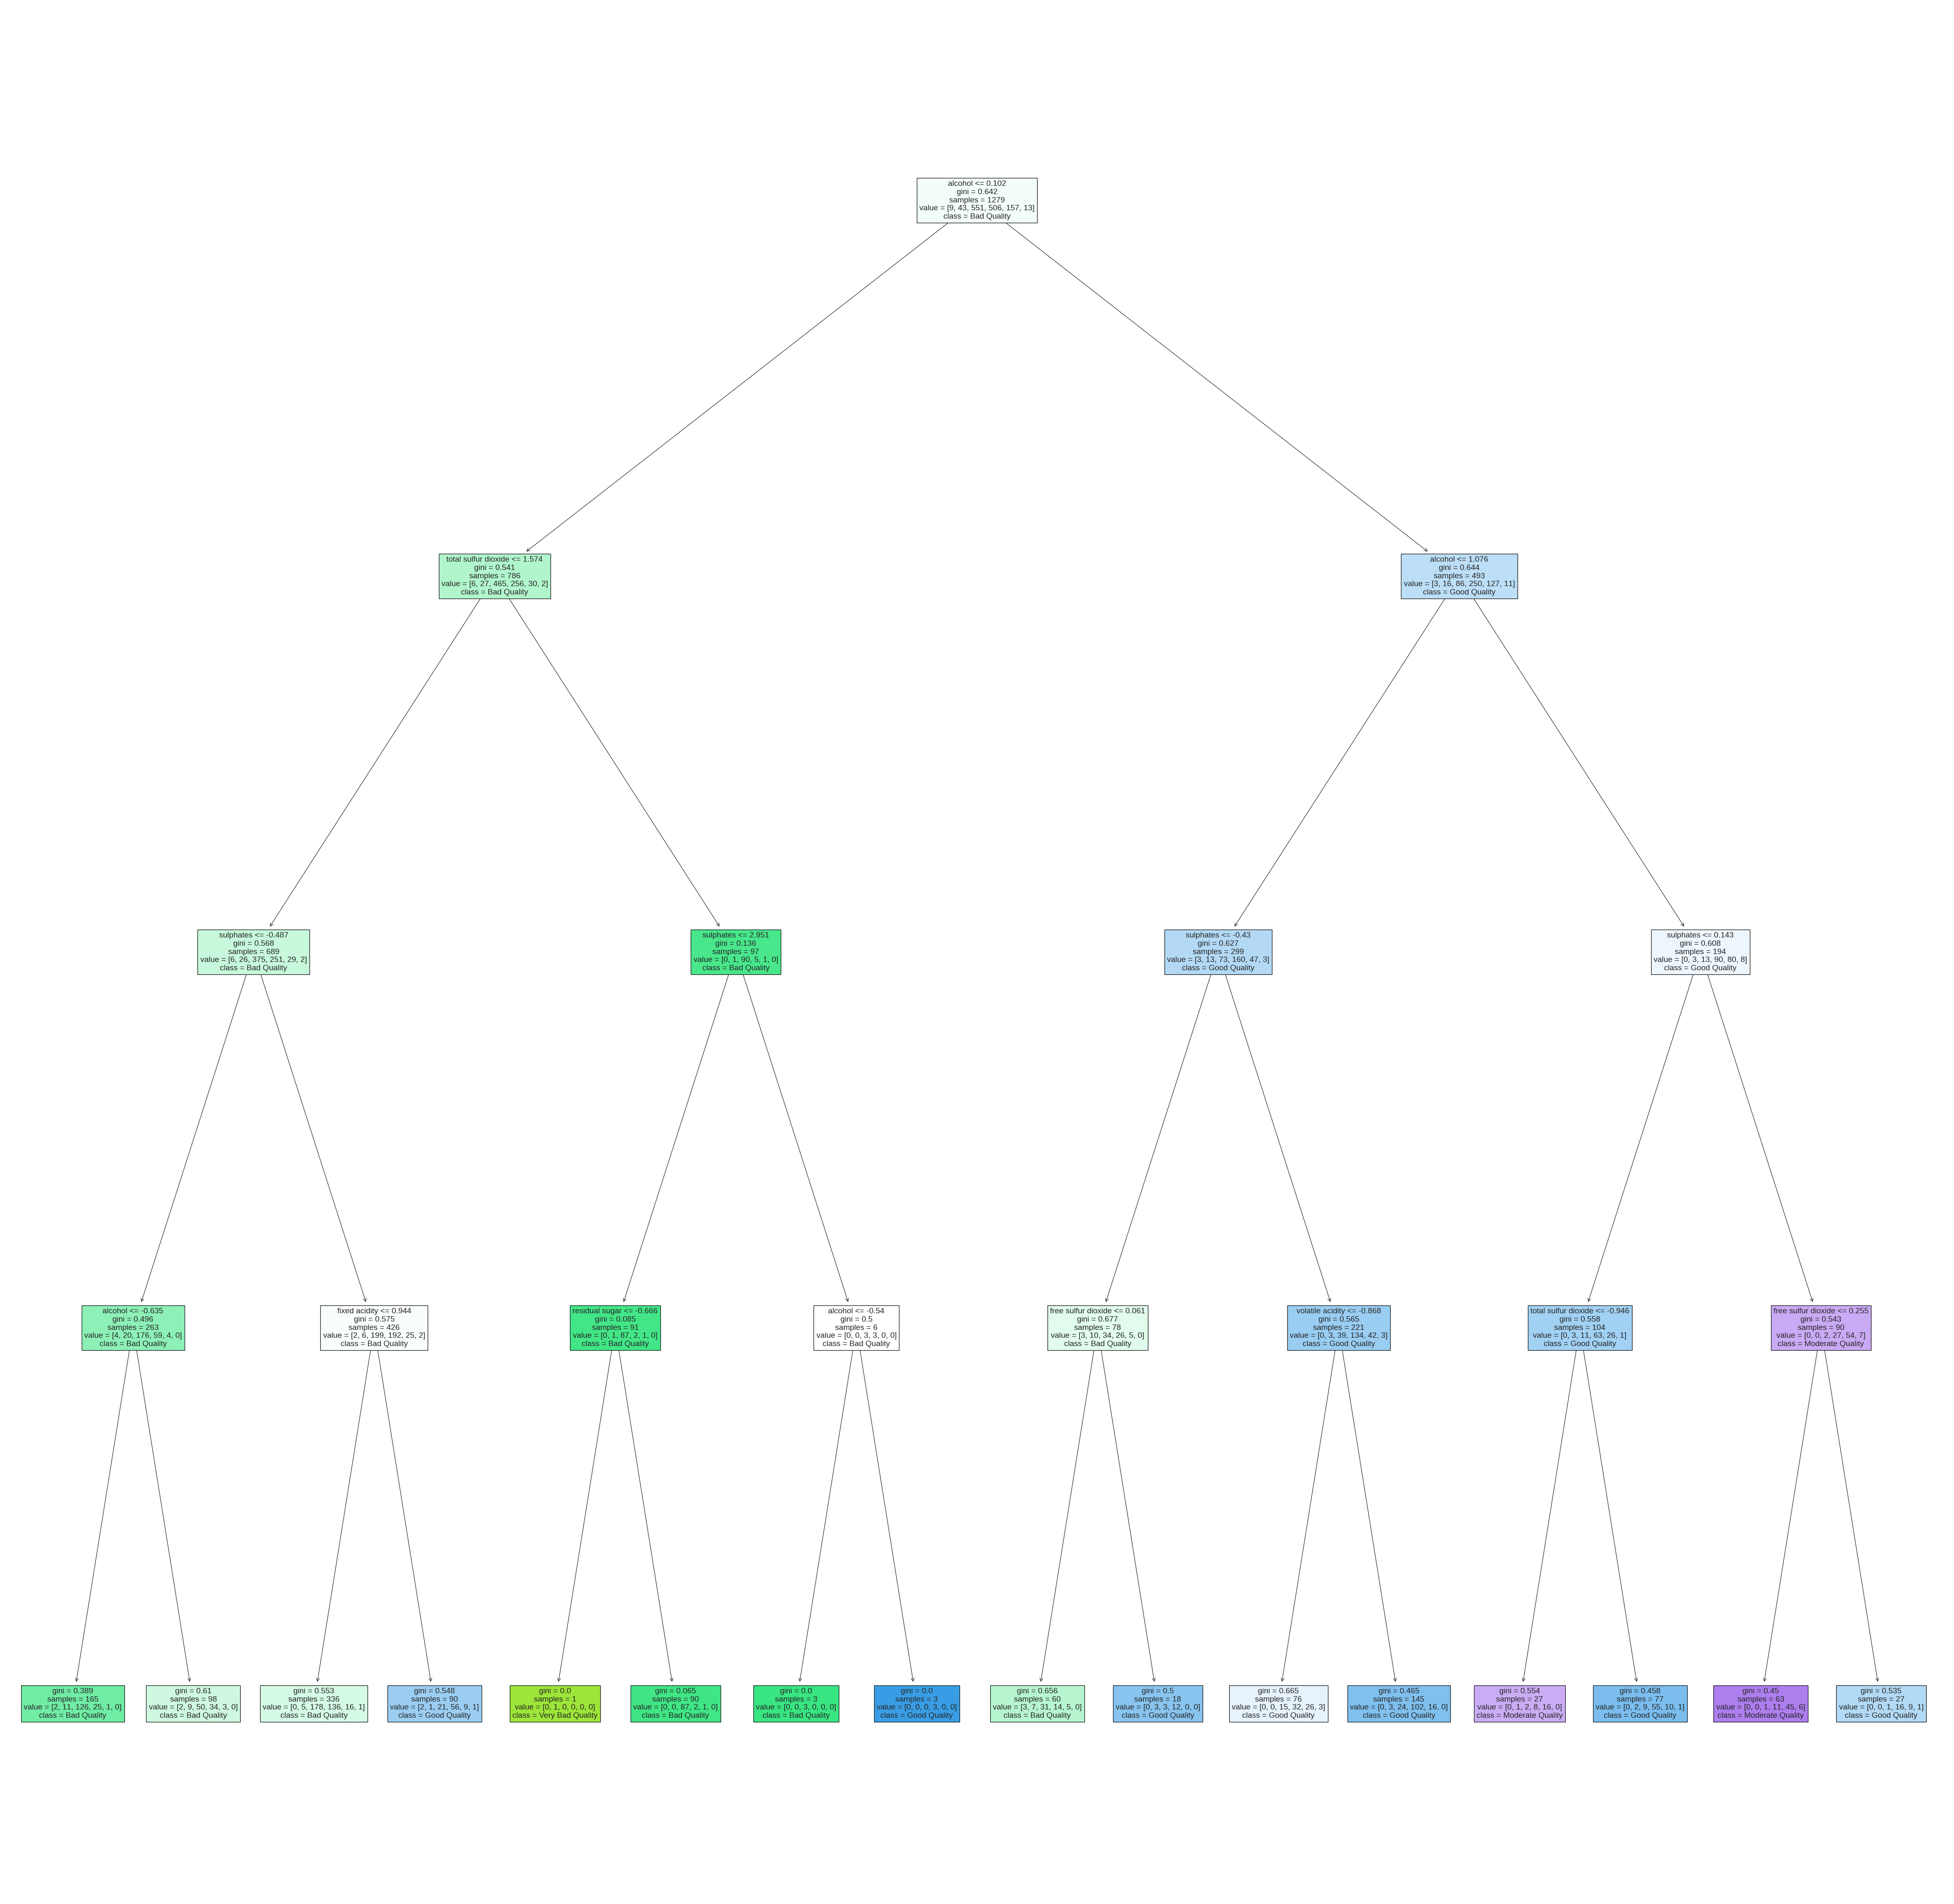

In [ ]:
from sklearn import tree
a=pd.DataFrame(wine_df.drop(['quality'],axis=1))
column_name=list(a)
fn=column_name
cn=['V.Very Bad Quality','Very Bad Quality','Bad Quality','Good Quality','Moderate Quality','Premium Quality']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,20),dpi=300)
tree.plot_tree(dt,
               feature_names=fn,
               class_names=cn,
               filled=True)

                    


[[  0   0   0   1   0   0]
 [  0   0   0  10   0   0]
 [  0   0   0 130   0   0]
 [  0   0   0 132   0   0]
 [  0   0   0  42   0   0]
 [  0   0   0   5   0   0]]


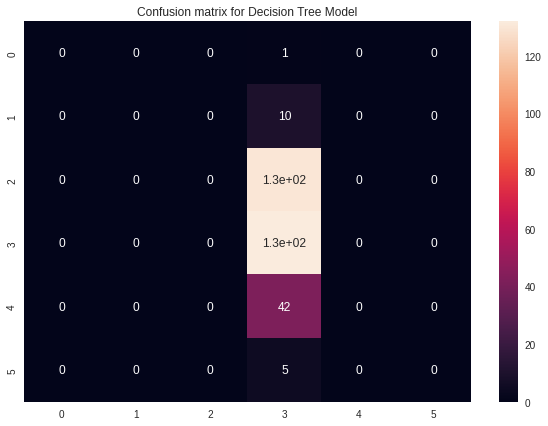

In [ ]:
print(metrics.confusion_matrix(y_test,dt_pred))
co_ma=metrics.confusion_matrix(y_test,dt_pred)
plt.figure(figsize=(10,7))
sns.heatmap(co_ma,annot=True)
plt.title("Confusion matrix for Decision Tree Model")
plt.show()

In [ ]:
print("Classification report for decision tree model")
print(metrics.classification_report(y_test,dt_pred))

Classification report for decision tree model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00       130
           3       0.41      1.00      0.58       132
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00         5

    accuracy                           0.41       320
   macro avg       0.07      0.17      0.10       320
weighted avg       0.17      0.41      0.24       320



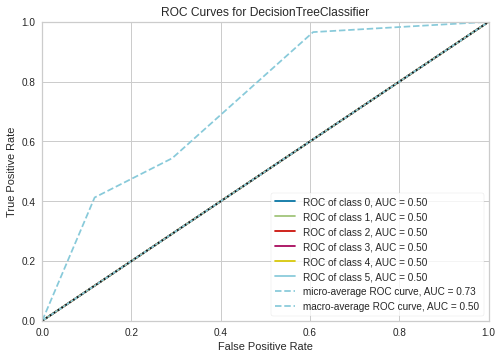

In [ ]:
visualizer2=ROCAUC(dt,classes=[0,1,2,3,4,5])
visualizer2.fit(X_train,y_train)
visualizer2.score(X_test,y_test)
visualizer2.show()
#all classes having same auc and microaverage score is more means there are many more true positives, average metric value is fine
#model is moderately fit

In [ ]:
print("Cross val score for DT model")
score2=cross_val_score(dt,X_train,y_train,cv=5)
score2.mean()

Cross val score for DT model


0.5942279411764706

**4. K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
pred_knn_prob=knn.predict_proba(X_test)[::,1]
print("Accuracy for KNN model)")
print(metrics.accuracy_score(y_test,pred_knn))

Accuracy for KNN model)
0.40625


In [ ]:
print(metrics.classification_report(y_test,pred_knn))
print("Cross_val_score",cross_val_score(knn,X_train,y_train,cv=5).mean())

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.41      0.98      0.58       130
           3       0.25      0.02      0.03       132
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00         5

    accuracy                           0.41       320
   macro avg       0.11      0.17      0.10       320
weighted avg       0.27      0.41      0.25       320

Cross_val_score 0.5739185049019608


Confusion Matrix for KNN Model
[[  0   0   1   0   0   0]
 [  0   0   9   1   0   0]
 [  0   0 128   2   0   0]
 [  0   0 128   2   2   0]
 [  0   0  39   3   0   0]
 [  0   0   5   0   0   0]]


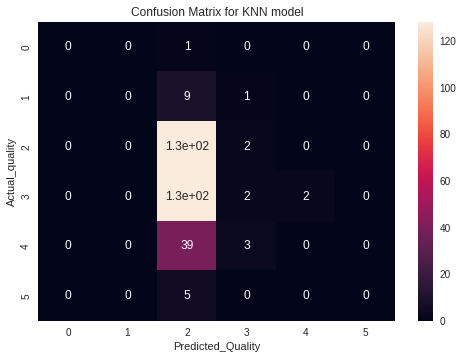

In [ ]:
con_knn=metrics.confusion_matrix(y_test,pred_knn)
print("Confusion Matrix for KNN Model")
print(con_knn)
sns.heatmap(con_knn,annot=True)
plt.title("Confusion Matrix for KNN model")
plt.xlabel("Predicted_Quality")
plt.ylabel("Actual_quality")
plt.show()

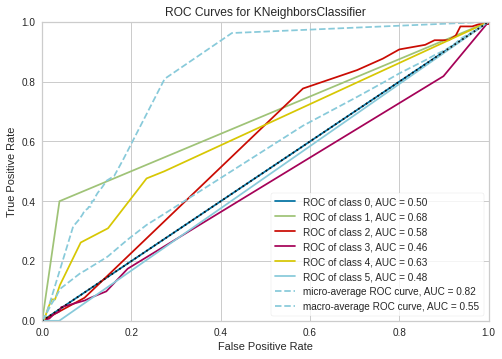

In [ ]:
visualizer3=ROCAUC(knn,classes=[0,1,2,3,4,5])
visualizer3.fit(X_train,y_train)
visualizer3.score(X_test,y_test)
visualizer3.show()
#class1 is having good auc score so it is a good fit and having 
#it classifies many of the classes
#seems to be not a perfectly good fit but partially good fit

**5.Support Vector Machine**

In [ ]:
#Initiating the model
from sklearn.svm import SVC
svc=SVC(C=1,gamma=0.1,kernel='rbf',random_state=100)
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
print("Accuracy score for SVM model")
print(metrics.accuracy_score(y_pred,y_test))

Accuracy score for SVM model
0.40625


In [ ]:
print("Classification report for SVM Model")
print(metrics.classification_report(y_test,svc_pred))
print("Cross_val_score for SVM model")
print(cross_val_score(svc,X_train,y_train,cv=10).mean())

Classification report for SVM Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.41      1.00      0.58       130
           3       0.00      0.00      0.00       132
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00         5

    accuracy                           0.41       320
   macro avg       0.07      0.17      0.10       320
weighted avg       0.17      0.41      0.23       320

Cross_val_score for SVM model
0.6271284448818898


Confusion Matrix for SVM model
[[  0   0   1   0   0   0]
 [  0   0  10   0   0   0]
 [  0   0 130   0   0   0]
 [  0   0 132   0   0   0]
 [  0   0  42   0   0   0]
 [  0   0   5   0   0   0]]


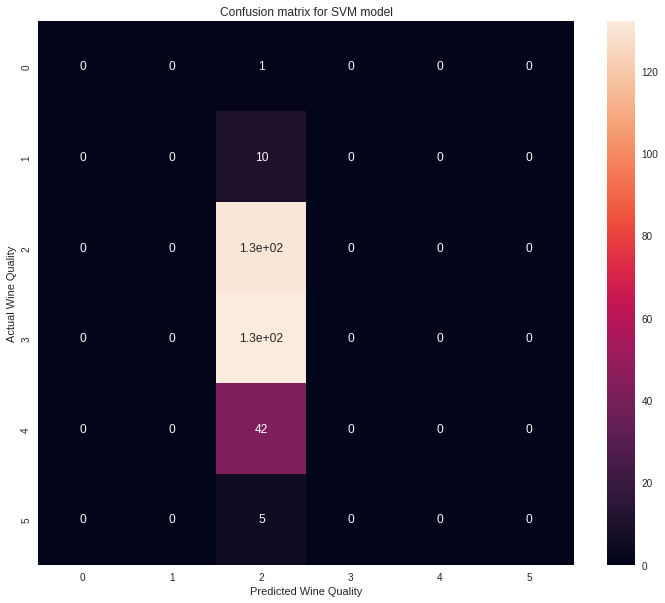

In [ ]:
conf_svm=metrics.confusion_matrix(y_test,svc_pred)
print("Confusion Matrix for SVM model")
print(conf_svm)
plt.figure(figsize=(12,10))
sns.heatmap(conf_svm,annot=True)
plt.title("Confusion matrix for SVM model")
plt.xlabel("Predicted Wine Quality")
plt.ylabel("Actual Wine Quality")
plt.show()

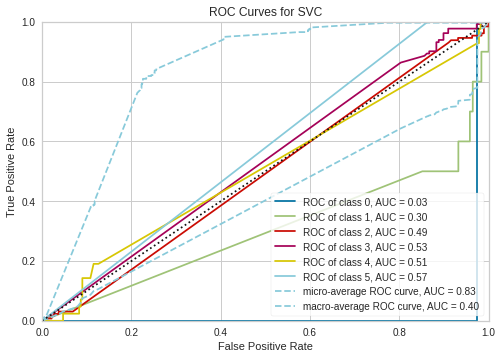

In [ ]:
visualizer4=ROCAUC(svc,classes=[0,1,2,3,4,5])
visualizer4.fit(X_train,y_train)
visualizer4.score(X_test,y_test)
visualizer4.show()
#Not a good fit model
#Average metric is good


**Summarizing all models w.r.t to accuracy score & cross val score**

In [ ]:
df=pd.DataFrame({"Model_Name":['Logistic Regression','Decision Tree','Random Forest','KNN','SVM'],
                 "Accuracy(in %)":[40,41,41,41,41],
                 "Cross_Val_Score":[60.7,59.4,67.2,57.3,62.7]}
                )
df

,Model_Name,Accuracy(in %),Cross_Val_Score
0,Logistic Regression,40,60.7
1,Decision Tree,41,59.4
2,Random Forest,41,67.2
3,KNN,41,57.3
4,SVM,41,62.7


**Plotting graph between Models & accuracy Score**

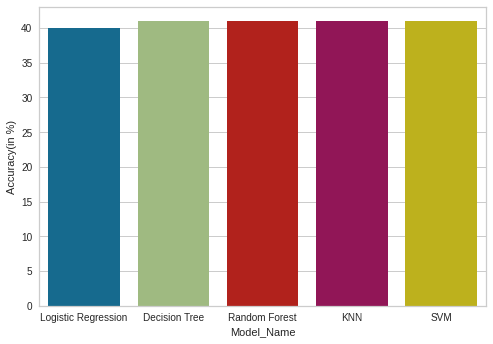

In [ ]:
sns.barplot(data=df,x='Model_Name',y='Accuracy(in %)')
plt.show()

**Plotting Graph Between Models Vs Cross Val Score**

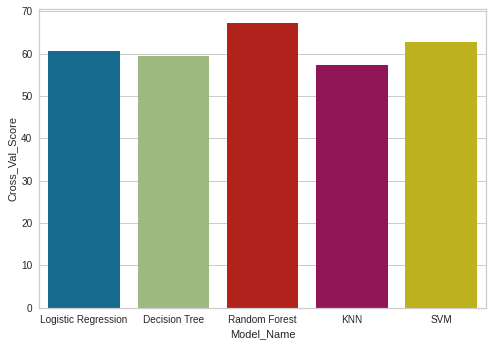

In [ ]:
sns.barplot(x='Model_Name',y='Cross_Val_Score',data=df)
plt.show()

**Prediction**

In [ ]:
input_data=(7.7,0.7,1.0,1.9,0.076,11.0,34.0,0.1,3.51,0.56,9.4)
input_data_as_numpy=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy.reshape(1,-1)
prediction=rforest.predict(input_data_reshaped)
print(prediction)
if prediction==0:
  print("Very Very Bad Quality Wine")
elif prediction==1:
  print("Very Bad Quality Wine")
elif prediction==2:
  print("Bad Quality Wine")
elif prediction==3:
  print("Moderate Quality Wine")
elif prediction==4:
  print("Good Quality Wine")
else:
  print("Premium Quality Wine")

[3]
Moderate Quality Wine


Conclusion

1.Since it is a multiclassification problem, so i am determining here the quality of wine on the scale basis.

2.In all models as observing the summary table accuracy is not up to the mark.Since the number of classes is more hence accuracy is not that much good.

3.The cross validation score throwing mean accuracy between 60-69%.

4.StandardScaling is  donw because we are using many distance based models.

5.NB is not used beacuse it is only done when there is no multicollinearity between independent variables.

6.NO treatment of outliers and multicollinearity is done in the dataset because the dataset is used for prediction purpose.

7.From all i would to select RF model follwed by KNN beacuse of having greater accuracy and high cross val score

8.since Multiclassification in each class doesnot throw that much of great results so what i have observed that there are some features which are very closely resembles with each other so i am doing that classification in that way and observing the model performance.
